# Dealing with Missing Values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Data Science and Business Analytics Lab/Class-Test-Performance.csv")

In [ ]:
test

,Roll No.,Class Test I,Class Test - II
0,TC01,19.0,15.0
1,TC02,30.0,30.0
2,TC03,23.0,29.0
3,TC04,16.0,28.0
4,TC05,17.0,NaN
...,...,...,...
75,TC81,15.0,19.0
76,TC82,76.0,76.0
77,TC83,67.0,75.0
78,TC84,66.0,72.0


**Check for missing values**

In [ ]:
missing_values=test.isnull().sum()
print(missing_values)

Roll No.            0
Class Test I       11
Class Test - II     5
dtype: int64


In [ ]:
mis_value_percent = 100 * test.isnull().sum() / len(test)
print(mis_value_percent)

Roll No.            0.00
Class Test I       13.75
Class Test - II     6.25
dtype: float64


**Visualizing missing values with Missingno**

In [ ]:
!pip install missingno

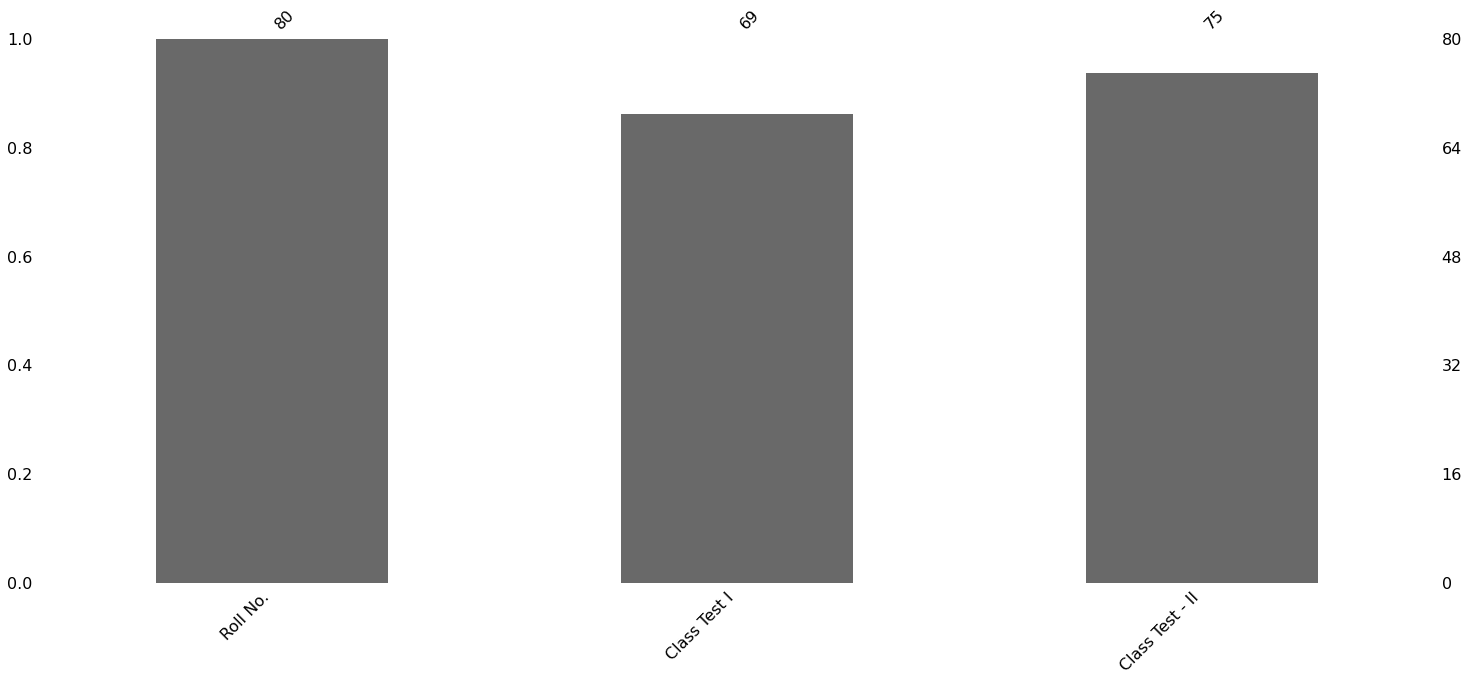

In [ ]:
import missingno as msno
msno.bar(test)

**Imputing the Missing Value**

In [ ]:
import numpy as np
test['Class Test I']=test['Class Test I'].replace(np.NaN,test['Class Test I'].mean())

**Replacing With Arbitrary Value**

In [ ]:
test['Class Test - II'] = test['Class Test - II'].fillna(0)
test['Class Test - II'].isnull().sum()

0

In [ ]:
test

,Roll No.,Class Test I,Class Test - II
0,TC01,19.00000,15.0
1,TC02,30.00000,30.0
2,TC03,23.00000,29.0
3,TC04,16.00000,28.0
4,TC05,17.00000,0.0
...,...,...,...
75,TC81,15.00000,19.0
76,TC82,76.00000,76.0
77,TC83,67.00000,75.0
78,TC84,66.00000,72.0


In [ ]:
missing_values=test.isnull().sum()
print(missing_values)

Roll No.           0
Class Test I       0
Class Test - II    0
dtype: int64


**Imputing Missing Values For Categorical Features**

In [ ]:
import pandas as pd
import numpy as np
X = pd.DataFrame({'Elective_Choice':['ML','IoT','IoT','IoT', 'ML', 'IoT', np.nan, 'STQA','Compiler','IoT','ML',np.nan,'ML','ML']})

In [ ]:
X

,Elective_Choice
0,ML
1,IoT
2,IoT
3,IoT
4,ML
5,IoT
6,NaN
7,STQA
8,Compiler
9,IoT


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(X)

array([['ML'],
       ['IoT'],
       ['IoT'],
       ['IoT'],
       ['ML'],
       ['IoT'],
       ['IoT'],
       ['STQA'],
       ['Compiler'],
       ['IoT'],
       ['ML'],
       ['IoT'],
       ['ML'],
       ['ML']], dtype=object)

In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value='missing')
imputer.fit_transform(X)

array([['ML'],
       ['IoT'],
       ['IoT'],
       ['IoT'],
       ['ML'],
       ['IoT'],
       ['missing'],
       ['STQA'],
       ['Compiler'],
       ['IoT'],
       ['ML'],
       ['missing'],
       ['ML'],
       ['ML']], dtype=object)

# Dealing with outliers

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science and Business Analytics Lab/Class-Test-Performance.csv")

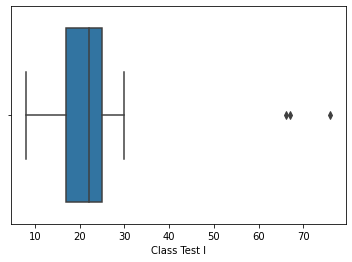

In [ ]:
import seaborn as sns
sns.boxplot(data=df['Class Test I'],x=df['Class Test I'])

In [ ]:
marks= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

Text(0.5, 0, 'marks')

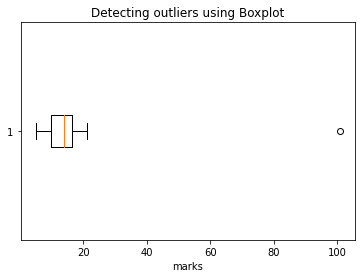

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(marks, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('marks')

**Detecting Outliers with Z-scores**

In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
marks_outliers = detect_outliers_zscore(marks)
print("Outliers from Z-scores method: ", marks_outliers)

Outliers from Z-scores method:  [101]


**Detecting outliers using the Inter Quantile Range(IQR)**

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
marks_outliers = detect_outliers_iqr(marks)
print("Outliers from IQR method: ", marks_outliers)

Outliers from IQR method:  [101]


**Trimming/Remove the outliers**

In [ ]:
Q1=df['Class Test I'].quantile(0.25)
Q3=df['Class Test I'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

17.0
25.0
8.0
5.0 37.0


In [ ]:
#Apply conditions to remove outliers
df = df[df['Class Test I']< Upper_Whisker]

In [ ]:
df

,Roll No.,Class Test I,Class Test - II
0,TC01,19.0,15.0
1,TC02,30.0,30.0
2,TC03,23.0,29.0
3,TC04,16.0,28.0
4,TC05,17.0,NaN
...,...,...,...
71,TC77,8.0,22.0
72,TC78,21.0,24.0
73,TC79,16.0,22.0
74,TC80,15.0,23.0


# Data Transformation

In [ ]:
import numpy as np

In [ ]:
academic_performance=pd.read_csv("/content/drive/MyDrive/Data Science and Business Analytics Lab/Academic-Performance.csv")

In [ ]:
academic_performance

,Roll No.,Class Test I,Class Test - II,Honour Course,Grade,Placement
0,TC01,19.0,15.0,AIML,1st Class,Yes
1,TC02,30.0,30.0,AIML,2nd Class,Yes
2,TC03,23.0,29.0,AIML,Distinction,Yes
3,TC04,16.0,28.0,Data Science,3rd Class,No
4,TC05,17.0,NaN,Data Science,3rd Class,Yes
...,...,...,...,...,...,...
75,TC81,15.0,19.0,AIML,1st Class,Yes
76,TC82,76.0,76.0,AIML,Distinction,Yes
77,TC83,67.0,75.0,AIML,1st Class,Yes
78,TC84,63.0,68.0,AIML,2nd Class,Yes


In [ ]:
#Find the categorical columns and separate it out with a different dataframe.
performance_categorical = academic_performance.select_dtypes(exclude=[np.number])
performance_categorical

,Roll No.,Honour Course,Grade,Placement
0,TC01,AIML,1st Class,Yes
1,TC02,AIML,2nd Class,Yes
2,TC03,AIML,Distinction,Yes
3,TC04,Data Science,3rd Class,No
4,TC05,Data Science,3rd Class,Yes
...,...,...,...,...
75,TC81,AIML,1st Class,Yes
76,TC82,AIML,Distinction,Yes
77,TC83,AIML,1st Class,Yes
78,TC84,AIML,2nd Class,Yes


Find the distinct unique values in the Grade column. To do so, use the unique() function from pandas with the column name.

In [ ]:
performance_categorical['Grade'].unique()

array(['1st Class', '2nd Class', 'Distinction', '3rd Class'], dtype=object)

Find the frequency distribution of each categorical column. To do so, use the value_counts() function on each column. This function returns the counts of unique values in an object.

In [ ]:
performance_categorical.Grade.value_counts()

1st Class      26
2nd Class      22
Distinction    22
3rd Class      10
Name: Grade, dtype: int64

In [ ]:
performance_categorical.Placement.value_counts()

Yes    62
No     18
Name: Placement, dtype: int64

**Replacement of Categorical Data with a Number**

Replace the entries in the Placement column. Replace Yes with 1 and No with -1. To do so, use the replace() function:

In [ ]:
performance_categorical.Placement.replace({"Yes":1, "No":-1}, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
performance_categorical

,Roll No.,Honour Course,Grade,Placement
0,TC01,AIML,1st Class,1
1,TC02,AIML,2nd Class,1
2,TC03,AIML,Distinction,1
3,TC04,Data Science,3rd Class,-1
4,TC05,Data Science,3rd Class,1
...,...,...,...,...
75,TC81,AIML,1st Class,1
76,TC82,AIML,Distinction,1
77,TC83,AIML,1st Class,1
78,TC84,AIML,2nd Class,1


**Label Encoding**

In [ ]:
performance_categorical = performance_categorical.drop('Roll No.',axis=1)

In [ ]:
performance_categorical

,Honour Course,Grade,Placement
0,AIML,1st Class,1
1,AIML,2nd Class,1
2,AIML,Distinction,1
3,Data Science,3rd Class,-1
4,Data Science,3rd Class,1
...,...,...,...
75,AIML,1st Class,1
76,AIML,Distinction,1
77,AIML,1st Class,1
78,AIML,2nd Class,1


In [ ]:
data_column_category = performance_categorical.select_dtypes(exclude=[np.number]).columns

In [ ]:
data_column_category

Index(['Honour Course ', 'Grade'], dtype='object')

In [ ]:
#import the LabelEncoder class

from sklearn.preprocessing import LabelEncoder

#Creating the object instance

label_encoder = LabelEncoder()

for i in data_column_category:

    performance_categorical[i] = label_encoder.fit_transform(performance_categorical[i])

print("Label Encoded Data: ")

performance_categorical.head()

Label Encoded Data: 


,Honour Course,Grade,Placement
0,0,0,1
1,0,1,1
2,0,3,1
3,1,2,-1
4,1,2,1


**One Hot Encoding**

In [ ]:
#Performing Onehot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded = onehot_encoder.fit_transform(performance_categorical[data_column_category])

In [ ]:
#Creating a dataframe with encoded data with new column name

onehot_encoded_frame = pd.DataFrame(onehot_encoded, columns = onehot_encoder.get_feature_names(data_column_category))

onehot_encoded_frame.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Honour Course _0,Honour Course _1,Grade_0,Grade_1,Grade_2,Grade_3
0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0
